In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn import decomposition, tree
import pandas as pd

In [42]:
def Euro_converter(currency,amount):
    coversion_dict = {'SEK':0.09703,'MXN':0.04358,'AUD':0.63161,'NZD':0.58377,'GBP':1.13355}
    return round(amount * coversion_dict[currency])

In [91]:
def loadData():
    data_set = pd.read_csv('data_for_student_case.csv')
	#Construct the dataframe format
    #Delete entries that have been recognised as Refused transactions
#     data_set=data_set.loc[data_set['simple_journal']!='Refused']
    #Convert amount into Euros
    data_set['EuroAmount']=data_set.apply(lambda row: Euro_converter(row['currencycode'],row['amount']),axis=1)
    #Convert creatiomn date into datetime format and extract each month, day, year,hour
    data_set['creationdate'] = pd.to_datetime(data_set['creationdate'],format='%Y-%m-%d %H:%M:%S')
    data_set['bookingdate'] = pd.to_datetime(data_set['bookingdate'],format='%Y-%m-%d %H:%M:%S')
    data_set['creation_month'] = data_set.creationdate.dt.month
    data_set['creation_year'] = data_set.creationdate.dt.year
    data_set['creation_day'] = data_set.creationdate.dt.day
    data_set['creation_hour'] = data_set.creationdate.dt.hour
    #label column to have simple_journal in binary format
#     data_set['label'] = np.where(data_set['simple_journal']=='Chargeback', 1, 0)
    return data_set

In [92]:
def heatmap(dataset, col1, col2, label):
# filter and aggregate data
    filtered_dataset = dataset[dataset['simple_journal'] == label]
    filtered_dataset = filtered_dataset.assign(simple_journal=1)
    aggregation_data = filtered_dataset.groupby([col1, col2]).size().reset_index(name='count')
# filter country code for pretty visualization
    account_code = list(dataset[col2][dataset.simple_journal == 'Chargeback'].unique())
    shopper_code = list(dataset[col1][dataset.simple_journal == 'Chargeback'].unique())
    aggregation_data = aggregation_data[aggregation_data[col2].isin(account_code)]
    aggregation_data = aggregation_data[aggregation_data[col1].isin(shopper_code)]
    final_data = aggregation_data.pivot(index=col2, columns=col1, values='count')
    sns.set()
    cmap = sns.cm.rocket_r
    sns.heatmap(final_data, linewidth=0.5,cmap = cmap)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.savefig('Heatmap')
    plt.show()

In [93]:
dataset = loadData()

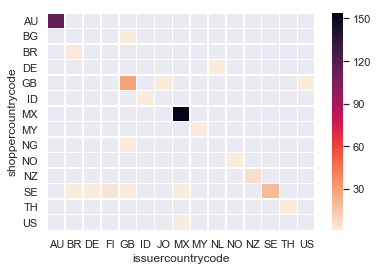

In [99]:
# label = 'Refused'
label = 'Chargeback'
col1 = 'issuercountrycode'
col2 = 'shoppercountrycode'
# print(dataset)
heatmap(dataset, col1, col2, label)

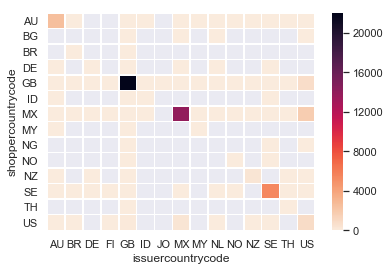

In [100]:
label = 'Refused'
# label = 'Chargeback'
col1 = 'issuercountrycode'
col2 = 'shoppercountrycode'
# print(dataset)
heatmap(dataset, col1, col2, label)

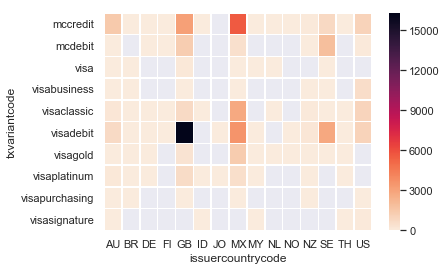

In [101]:
label = 'Refused'
# label = 'Chargeback'
col1 = 'issuercountrycode'
col2 = 'txvariantcode'
# print(dataset)
heatmap(dataset, col1, col2, label)

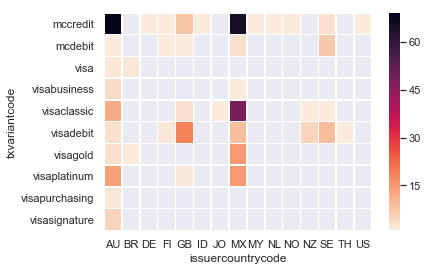

In [102]:
# label = 'Refused'
label = 'Chargeback'
col1 = 'issuercountrycode'
col2 = 'txvariantcode'
# print(dataset)
heatmap(dataset, col1, col2, label)